In [ ]:
import os, random, math
from pprint import pprint
from datetime import datetime as dt
 
 
import numpy as np
import keras as k
 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Training" -d "/content"

In [ ]:
!unzip -uq "/content/drive/MyDrive/Test" -d "/content"

In [ ]:
2.2. Importing the Modules
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the directory paths to the dataset
Chargez les chemins de répertoire dans l'ensemble de données
DATA_DIR = '../content'
TRAIN_DIR = DATA_DIR + '/Training'
TEST_DIR = DATA_DIR + '/Test'

In [ ]:
2.3. Exploring the Data
# Look at the root directory
Regardez le répertoire racine
print('The folders inside the root directory are: ')
print(os.listdir(DATA_DIR))

# The classes are the name of the folders inside the Training directory
Les classes sont le nom des dossiers dans le répertoire Training
train_classes = os.listdir(TRAIN_DIR)
print('\nThe classes on the Training directory are: ')
print(train_classes)
print('The Training directory has %s classes.' %len(train_classes))

# The classes are the name of the folders inside the Test directory
test_classes = os.listdir(TEST_DIR)
print('\nThe classes on the Test directory are: ')
print(test_classes)
print('The Training directory has %s classes. \n' %len(test_classes))

The folders inside the root directory are: 
['.config', 'Test', 'drive', 'Training', 'sample_data']

The classes on the Training directory are: 
['Lychee', 'Avocado', 'Pomegranate', 'Apple Red 3', 'Redcurrant', 'Grape White 2', 'Rambutan', 'Cherry Wax Yellow', 'Pear', 'Granadilla', 'Mulberry', 'Blueberry', 'Orange', 'Lemon Meyer', 'Limes', 'Apple Golden 1', 'Onion White', 'Eggplant', 'Tomato 4', 'Potato Sweet', 'Corn', 'Peach Flat', 'Tomato Cherry Red', 'Hazelnut', 'Clementine', 'Tangelo', 'Carambula', 'Strawberry Wedge', 'Grape Pink', 'Apple Golden 3', 'Potato Red', 'Strawberry', 'Grapefruit Pink', 'Beetroot', 'Cherry Wax Red', 'Tomato Maroon', 'Cantaloupe 2', 'Maracuja', 'Grape White 4', 'Kiwi', 'Cauliflower', 'Cherry Rainier', 'Mandarine', 'Apple Red Yellow 1', 'Cucumber Ripe', 'Pineapple Mini', 'Banana Lady Finger', 'Plum 2', 'Cherry Wax Black', 'Apple Red Delicious', 'Pepper Yellow', 'Raspberry', 'Apple Braeburn', 'Pitahaya Red', 'Pepper Green', 'Peach 2', 'Tomato 3', 'Huckleberry

In [ ]:
print('\nThe images inside the /Training/Apple Red 2 directory are:')
print(os.listdir(TRAIN_DIR + '/Apple Red 2'))
print('\nThe /Training/Apple Red 2 directory has %s images.' %len(os.listdir(TRAIN_DIR + '/Apple Red 2')))


The images inside the /Training/Apple Red 2 directory are:
['r_137_100.jpg', '299_100.jpg', 'r_121_100.jpg', '197_100.jpg', 'r_18_100.jpg', '300_100.jpg', 'r_316_100.jpg', 'r_198_100.jpg', 'r_191_100.jpg', '273_100.jpg', 'r_294_100.jpg', '20_100.jpg', '253_100.jpg', 'r_153_100.jpg', '22_100.jpg', 'r_239_100.jpg', '202_100.jpg', '128_100.jpg', 'r_317_100.jpg', '318_100.jpg', '247_100.jpg', '286_100.jpg', '110_100.jpg', 'r_311_100.jpg', '127_100.jpg', '191_100.jpg', 'r_296_100.jpg', '11_100.jpg', 'r_168_100.jpg', '139_100.jpg', 'r_187_100.jpg', '209_100.jpg', 'r_228_100.jpg', 'r_201_100.jpg', 'r_320_100.jpg', '203_100.jpg', 'r_128_100.jpg', '180_100.jpg', 'r_29_100.jpg', '179_100.jpg', 'r_305_100.jpg', 'r_154_100.jpg', '271_100.jpg', 'r_229_100.jpg', '136_100.jpg', 'r_20_100.jpg', 'r_290_100.jpg', 'r_233_100.jpg', '101_100.jpg', '320_100.jpg', 'r_162_100.jpg', 'r_200_100.jpg', 'r_101_100.jpg', '207_100.jpg', '310_100.jpg', '306_100.jpg', 'r_148_100.jpg', '130_100.jpg', '280_100.jpg', '2

In [ ]:
print('\nThe images inside the /Test/Apple Red 2 directory are:')
print(os.listdir(TEST_DIR + '/Apple Red 2'))
print('\nThe /Test/Apple Red 2 directory has %s images.' %len(os.listdir(TEST_DIR + '/Apple Red 2')))


The images inside the /Test/Apple Red 2 directory are:
['r_84_100.jpg', '61_100.jpg', 'r_78_100.jpg', 'r_72_100.jpg', 'r_322_100.jpg', 'r_55_100.jpg', 'r_60_100.jpg', 'r_40_100.jpg', '6_100.jpg', '3_100.jpg', '35_100.jpg', '80_100.jpg', '85_100.jpg', 'r_65_100.jpg', 'r_66_100.jpg', '86_100.jpg', '99_100.jpg', 'r_63_100.jpg', '49_100.jpg', 'r_53_100.jpg', 'r_75_100.jpg', '55_100.jpg', 'r_42_100.jpg', '46_100.jpg', 'r_85_100.jpg', 'r_61_100.jpg', '83_100.jpg', 'r_94_100.jpg', 'r_79_100.jpg', 'r_51_100.jpg', 'r_76_100.jpg', 'r_324_100.jpg', 'r_48_100.jpg', '33_100.jpg', '45_100.jpg', '59_100.jpg', '77_100.jpg', '89_100.jpg', 'r_323_100.jpg', 'r_82_100.jpg', '93_100.jpg', '62_100.jpg', 'r_71_100.jpg', '96_100.jpg', '34_100.jpg', 'r_321_100.jpg', '50_100.jpg', '94_100.jpg', 'r_8_100.jpg', 'r_49_100.jpg', '92_100.jpg', 'r_92_100.jpg', '56_100.jpg', 'r_54_100.jpg', 'r_34_100.jpg', '324_100.jpg', 'r_3_100.jpg', 'r_325_100.jpg', 'r_68_100.jpg', '54_100.jpg', '40_100.jpg', '69_100.jpg', 'r_83_1

In [ ]:
# Training and Validation Datasets
# Data Transformations
#Data transformations
#Randomized Data Augmentations seront appliquées à des transformations choisies au hasard lors du chargement des images à partir de l'ensemble de données d'entraînement.
 #Plus précisément, chaque image sera remplie de 10 pixels, puis retournera l'image horizontalement avec une 
 probabilité de 50%. Enfin, une rotation aléatoire de 20 degrés sera appliquée. Comme la transformation sera appliquée e manière aléatoire et dynamique à chaque fois qu'une image particulière est chargée, le modèle voit des images légèrement différentes à chaque époque d'apprentissage, ce qui lui permet de mieux généraliser 
train_tfms = tt.Compose([tt.RandomCrop(100, padding=10, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomRotation(20),
                         tt.ToTensor()
                         ])
Dans le contexte de l'entraînement d'un modèle, l'epoch est un terme utilisé pour référer à une itération où le modèle voit tout le training set pour mettre à jour ses coefficients.
valid_tfms = tt.Compose([tt.ToTensor()])

In [ ]:
#  d'utiliser le module ImageFolder fourni par PyTorch pour charger les ensembles de données en tant que Tensors
Tensors :multidimensional array
train_ds = ImageFolder(TRAIN_DIR, train_tfms)
valid_ds = ImageFolder(TEST_DIR, valid_tfms)

In [ ]:
#Maintenant que les données sont chargées en tant que tenseurs, 
#t
# il est possible d'explorer les données.

Définissons une fonction pour cela:
def show_example_train(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

def show_example_test(img, label):
    print('Label: ', valid_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

Label:  Apple Braeburn (0)
Image size:  torch.Size([3, 100, 100])


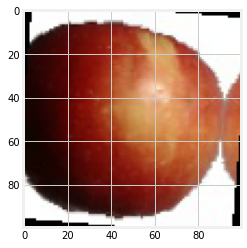

In [ ]:
show_example_train(*train_ds[0])

Label:  Cantaloupe 1 (22)
Image size:  torch.Size([3, 100, 100])


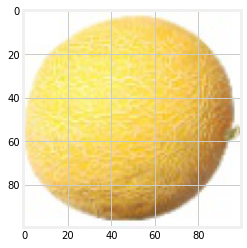

In [ ]:
show_example_test(*valid_ds[3695])

In [ ]:

# DataLoaders
batch_size_custom = 32      # Batch size for custom CNN model Taille du lot pour le modèle CNN personnalisé
  # Taille du lot pour le modèle CNN resnet
batch_size_resnet = 32     # Batch size for resnet CNN model
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
#, deux architectures CNN différentes seront discutées et comparées, il sera nécessaire de définir deux lots différents:
, il est possible d'utiliser le module DataLoader de PyTorch pour charger les ensembles de données comme:

train_dl_custom et valid_dl_custom pour le modèle CNN personnalisé, et
train_dl_resnet et valid_dl_resnet pour le modèle resnet CNN, respectivement
DataLoaders for Custom CNN Model
DataLoaders pour modèle CNN personnalisé
train_dl_custom = DataLoader(train_ds, batch_size_custom, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_custom = DataLoader(valid_ds, batch_size_custom*2, num_workers=3, pin_memory=True)

In [ ]:
# DataLoaders for ResNet CNN Model
train_dl_resnet = DataLoader(train_ds, batch_size_resnet, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_resnet = DataLoader(valid_ds, batch_size_resnet*2, num_workers=3, pin_memory=True)

In [ ]:
#Notice that shuffle=True was selected for the training dataloader, so that the batches generated in each epoch are different, and this randomization helps generalize & speed up (acceleer) the training process.

On the other hand, since the validation dataloader is used only for evaluating the model, there is no need to shuffle the images.

Let's take a look at some sample images from the training dataloade

On the other hand, since the validation dataloader is used only for evaluating the model, there is no need to shuffle the images.

Let's take a look at some sample images from the training dataloader.
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

train_dl_custom dataloader samples: 


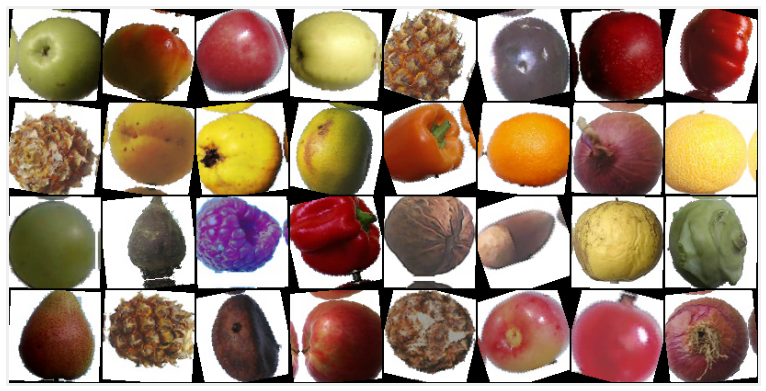

In [ ]:
print('train_dl_custom dataloader samples: ')
show_batch(train_dl_custom)

valid_dl_custom dataloader samples: 


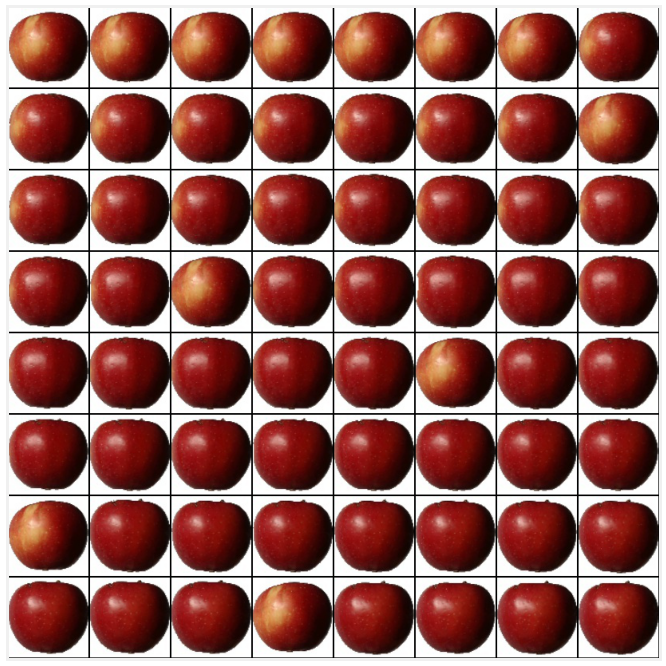

In [ ]:
print('valid_dl_custom dataloader samples: ')
show_batch(valid_dl_custom)

train_dl_resnet dataloader samples: 


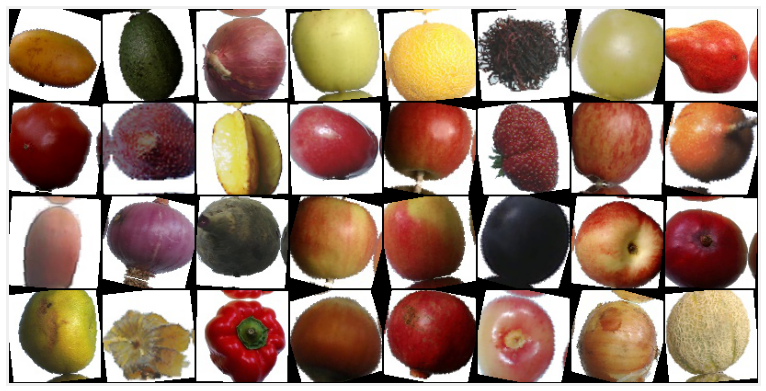

In [ ]:
print('train_dl_resnet dataloader samples: ')
show_batch(train_dl_resnet)

valid_dl_resnet dataloader samples: 


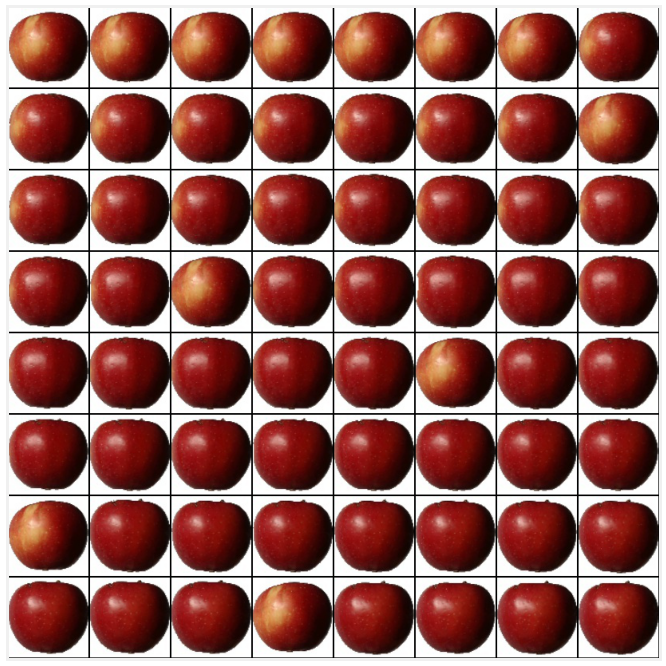

In [ ]:
print('valid_dl_resnet dataloader samples: ')
show_batch(valid_dl_resnet)

train_dl_resnet dataloader samples: 


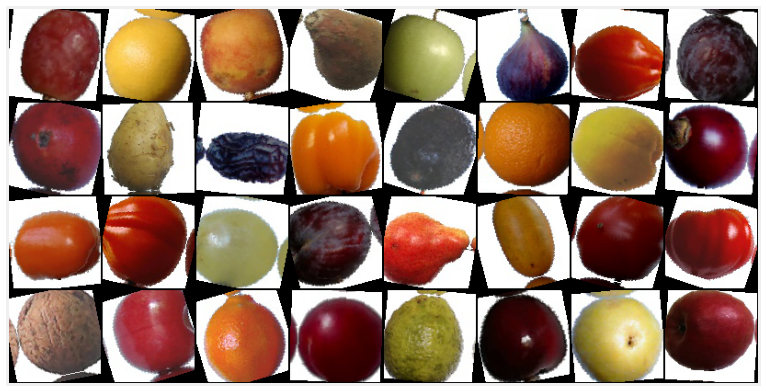

In [ ]:
print('train_dl_resnet dataloader samples: ')
show_batch(train_dl_resnet)

valid_dl_resnet dataloader samples: 


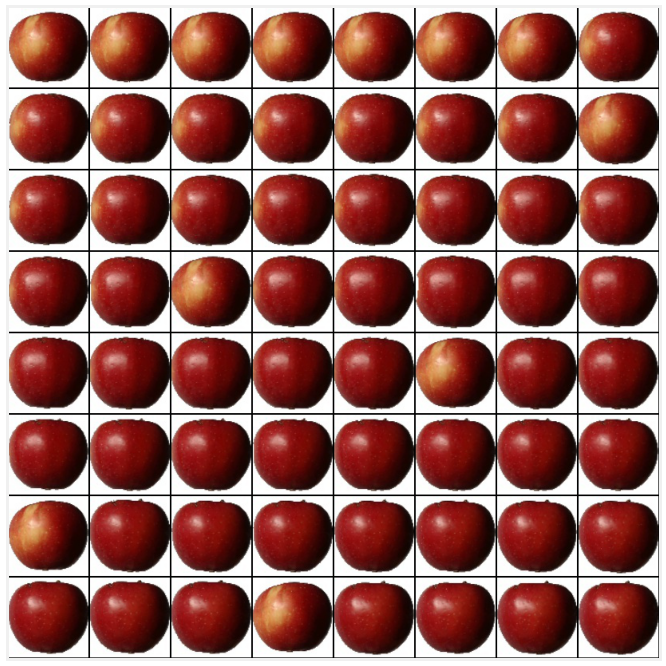

In [ ]:
print('valid_dl_resnet dataloader samples: ')
show_batch(valid_dl_resnet)

In [ ]:
#Utilisation du GPU
À mesure que la taille de nos modèles et de nos ensembles de données augmente, nous devons utiliser des GPU 
pour entraîner nos modèles dans un délai raisonnable. Les GPU contiennent des centaines de cœurs optimisés pour effectuer en peu de temps des opérations matricielles coûteuses sur des nombres à virgule flottante, ce qui les rend idéaux pour entraîner des réseaux de neurones profonds avec de nombreuses couches.


torch.cuda.is_available()

True

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Device Data Loader for Custom CNN Model
train_dl_custom = DeviceDataLoader(train_dl_custom, device)
valid_dl_custom = DeviceDataLoader(valid_dl_custom, device)

In [ ]:
# Device Data Loader for Custom CNN Model
train_dl_resnet = DeviceDataLoader(train_dl_resnet, device)
valid_dl_resnet = DeviceDataLoader(valid_dl_resnet, device)

In [ ]:
#Defining the Model

On construit une fonction accuracy pour calculer la précision à chaque epochs 
Une classe ImageClassification qui contient un ensemble de fonction pour le calcul accuracy à chaque epoch d’entrainement et de validation et également montrer accuracy final pour les deux( entrainement et validation) 

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, labels)                   # Calculate training loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                                    # Generate predictions
        loss = F.cross_entropy(out, labels)                   # Calculate validation loss
        acc = accuracy(out, labels)                           # Calculate accuracy
        return {'val_loss': loss.detach(),  'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()         # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()            # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.10f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
!wget -q "https://download.pytorch.org/models/resnet34-333f7ec4.pth"

In [ ]:
#Nous avons construit une classe ResnetCNN pour implémenter  notre modèle pré entrainé resnet34  
où la dernière couche sera modifiée pour s'adapter à l'ensemble de données utilisé 
La fonction freeze consiste à contrôler la façon dont les poids sont mis à jour, cela signifie que les poids ne peuvent plus être modifiés.
Par contre La fonction unfreeze permet la modification des poids dans les couches.
Cette technique consiste à réduire le temps de calcul pour l'entraînement tout en ne perdant pas beaucoup du côté de la précision.

class ResNetCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)     # You can change the resnet model here
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 131)          # Output classes
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [ ]:
!pip install tqdm

In [ ]:
@torch.no_grad()
#Evaluation :

#evaluate fonction évaluera le modèle d'apprentissage à chaque époque. Cela fournira en sortie la qualité ou la gravité du modèle de formation.

 "get_lrou "obtenir le taux d'apprentissage", optimisera le taux d'apprentissage à chaque époque.

def evaluate(model, val_loader):
    print('Evaluating Model ...')
    model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        print('\nTraining Model ...')
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
epochs = 10
max_lr = 1e-3
grad_clip = 1e-1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
import torchvision.models as models

In [ ]:
#À ce stade, tout est prêt pour le training  du modèle ResNet .

il suffit alors de les charger dans le modèle CNN et de déplacer ensuite le modèle vers l'appareil (cpu ou cuda GPU) précédemment sélectionné.

resnet_model = to_device(ResNetCNN(), device)
resnet_model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


ResNetCNN(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
#Maintenant, évaluons le modèle et voyons comment il fonctionne.
from tqdm import tqdm_notebook as tqdm

In [ ]:
history_ResNetCNN = [evaluate(resnet_model, valid_dl_resnet)]
history_ResNetCNN

Evaluating Model ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[{'val_acc': 0.009639084339141846, 'val_loss': 4.8961381912231445}]

In [ ]:
#Tout d'abord, on fait un freeze les couches ResNet et former certaines époques. 
Cela entraîne uniquement la couche finale pour commencer à classer les images.
resnet_model.freeze()

In [ ]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-2, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Evaluating Model ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Epoch [0], last_lr: 0.0075986279, train_loss: 4.0303, val_loss: 4.0958, val_acc: 0.1883

Training Model ...



Evaluating Model ...



Epoch [1], last_lr: 0.0095048463, train_loss: 4.0240, val_loss: 4.0098, val_acc: 0.4816

Training Model ...



Evaluating Model ...



Epoch [2], last_lr: 0.0061126202, train_loss: 3.9802, val_loss: 3.9727, val_acc: 0.6223

Training Model ...



Evaluating Model ...



Epoch [3], last_lr: 0.0018825835, train_loss: 3.9440, val_loss: 3.9314, val_acc: 0.8620

Training Model ...



Evaluating Model ...



Epoch [4], last_lr: 0.0000000400, train_loss: 3.9192, val_loss: 3.9162, val_acc: 0.9213
CPU times: user 10min 21s, sys: 46.7 s, total: 11min 7s
Wall time: 12min 5s


In [ ]:
resnet_model.unfreeze()

In [ ]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-3, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Evaluating Model ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Epoch [0], last_lr: 0.0007598628, train_loss: 3.9155, val_loss: 3.9197, val_acc: 0.9129

Training Model ...



Evaluating Model ...



Epoch [1], last_lr: 0.0009504846, train_loss: 3.9176, val_loss: 3.9301, val_acc: 0.8702

Training Model ...



Evaluating Model ...



Epoch [2], last_lr: 0.0006112620, train_loss: 3.9134, val_loss: 3.9108, val_acc: 0.9474

Training Model ...



Evaluating Model ...



Epoch [3], last_lr: 0.0001882583, train_loss: 3.9073, val_loss: 3.9069, val_acc: 0.9669

Training Model ...



Evaluating Model ...



Epoch [4], last_lr: 0.0000000040, train_loss: 3.9036, val_loss: 3.9042, val_acc: 0.9736
CPU times: user 10min 15s, sys: 45.6 s, total: 11min 1s
Wall time: 11min 57s


In [ ]:
def plot_accuracies(history, model_name):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(model_name + ' - Accuracy vs. No. of epochs');

def plot_losses(history, model_name):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title(model_name + ' - Loss vs. No. of epochs');

def plot_lrs(history, model_name):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title(model_name + ' - Learning Rate vs. Batch no.');

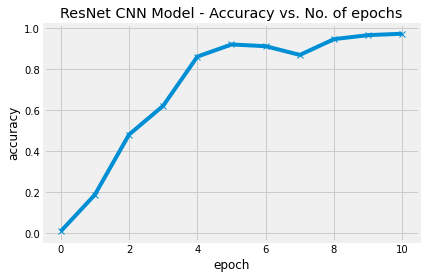

In [ ]:
plot_accuracies(history_ResNetCNN, 'ResNet CNN Model')

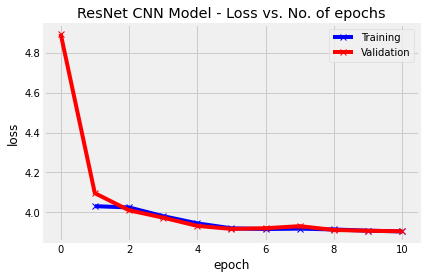

In [ ]:
plot_losses(history_ResNetCNN, 'ResNet CNN Model')

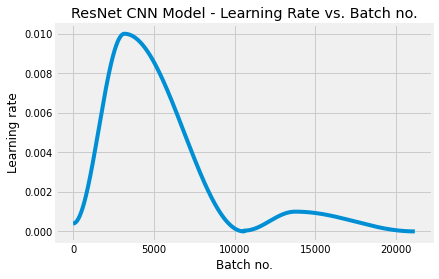

In [ ]:
plot_lrs(history_ResNetCNN, 'ResNet CNN Model')

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return valid_ds.classes[preds[0].item()]

Label: Avocado ripe , Predicted: Avocado ripe


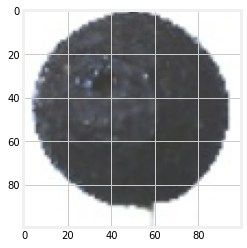

In [ ]:
img, label = valid_ds[2569]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

Label: Kumquats , Predicted: Kumquats


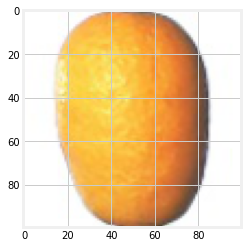

In [ ]:
img, label = valid_ds[9856]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

In [ ]:

torch.save(resnet_model.state_dict(), 'fruits-360-resnet.pth')